In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('E:\DATASETS\iris.csv')

In [3]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
variety         object
dtype: object

In [5]:
#if we have more than 2 values as labels such as high,low,medium.
#Generally it is yes or no - which is binary classification
#when variable increases confusion matrix change accordingly. Binary classifcation
#graph is 2x2.. rest are 3x3, 4x4.. and so on

In [6]:
lbls = df['variety'].unique()
lbls

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [8]:
#separating independent and dependent variables (species)
X = df.drop(['variety'], axis=1)
y = df['variety']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
#to know the shape of the train and test dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [10]:
#we use Support Vector Classifier as a Classifier
from sklearn.svm import SVC
#training the classifier using X_train and y_train
clf = SVC(kernel = 'linear').fit(X_train, y_train)
clf.predict(X_test)

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa'], dtype=object)

In [11]:
#testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
#creating a confusion matrix which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [13]:
cm_df = pd.DataFrame(cm, index = lbls, columns = lbls)
cm_df

,Setosa,Versicolor,Virginica
Setosa,16,0,0
Versicolor,0,17,1
Virginica,0,0,11


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

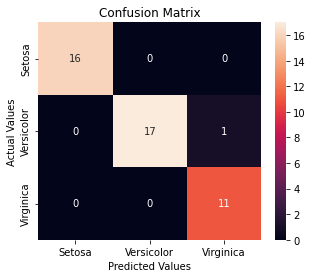

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()